In [66]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
%matplotlib inline
data1 = pd.read_csv('Algerian_forest_fires_dataset_UPDATE.csv')
# data1["area"].max()
data1 = data1.drop(columns=["month","day","year"])
# data1=data1.dropna()
data1 = data1[data1['Classes  '].notna()]
data1 = data1.replace({'Classes  ': {'fire   ': 1, 'not fire    ': 0, 'not fire     ': 0, 'not fire   ': 0}})
print(data1.columns.tolist())
# data1["Classes  "] = le.fit_transform(data1["Classes  "])
x3 = data1.drop(columns=["Classes  "])
y3 = data1["Classes  "]
data1.head()

['Temperature', ' RH', ' Ws', 'Rain ', 'FFMC', 'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes  ']


,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
0,32,71,12,0.7,57.1,2.5,8.2,0.6,2.8,0.2,0
1,30,73,13,4.0,55.7,2.7,7.8,0.6,2.9,0.2,0
2,29,80,14,2.0,48.7,2.2,7.6,0.3,2.6,0.1,0
3,30,64,14,0.0,79.4,5.2,15.4,2.2,5.6,1,0
4,32,60,14,0.2,77.1,6.0,17.6,1.8,6.5,0.9,0


In [61]:
myset = set(data1["Classes  "])
print(myset)

{'not fire   ', 'not fire     ', 'not fire    ', 'fire   ', nan}


<ipython-input-67-5faab5a918a0>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data1.corr())


<Axes: >

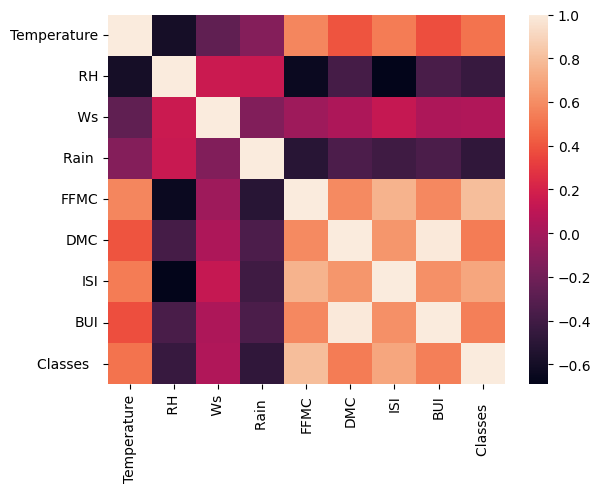

In [67]:
sns.heatmap(data1.corr())

In [69]:
from sklearn import linear_model
data1le = data1
# data1le.st = le.fit_transform(data1le.st)
X = x3
Y = y3
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X,Y,test_size=0.2)
reg = linear_model.LinearRegression()
reg.fit(x_train,y_train)
print("Linear Classification Accuracy: {:.4f}%".format(reg.score(x_test, y_test) * 100))
# reg.coef_
# reg.intercept_
# reg.predict([[42,43,10]])
reg.score(x_test,y_test)

Linear Classification Accuracy: 62.9640%


0.6296399607248289

In [70]:
from sklearn.linear_model import LogisticRegression
md = LogisticRegression()
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x3,y3,test_size=0.2)
# md.fit(x_train, y_train)
# md.predict([[42,43,10]])
# md.score(x_test,y_test)
# md.predict_proba(x_test)
from sklearn import tree
md = tree.DecisionTreeRegressor()
md.fit(x_train,y_train)
md.score(x_test,y_test)
# from sklearn.svm import SVC
# sv = SVC() #C=> regularization = distance
# sv.fit(x_train,y_train)
# sv.score(x_test,y_test)
# md.predict([[42,43,10]])

0.6527777777777779

In [71]:
from sklearn.svm import SVR
sv = SVR() #C=> regularization = distance
sv.fit(x_train,y_train)
sv.score(x_test,y_test)

0.589185293765181

In [74]:
from sklearn.ensemble import RandomForestRegressor
md = RandomForestRegressor()
md.fit(x_train,y_train)
md.score(x_test,y_test)

0.8143576388888889